In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from os import path
import pickle
import itertools
from functools import partial
import pprint
pp = pprint.PrettyPrinter(indent=4)

from decisionset import DecisionSet
from itemset import Itemset, Rule, Transaction, prep_db, feat2item
from sampling import sample
from div import GreedyDiv
from util import recall, precision, dispersion, printRules
from latex import latex

from experiment import new_exp, get_loader

In [3]:
loader = get_loader()

In [4]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [5]:
diff = lambda a: np.max(a) - np.min(a)

# Supervised

## k

In [5]:
# loader.find_latest().to_dict()
version = 57

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
#     {"config.dataset": "iris"}
        ]}
qs = loader.find(query)
df = qs.project(on=[
#                 'config.it',
                {'metrics.n': np.sum},
#                 {'metrics.imb': np.sum},
#                 {'metrics.nitem': np.sum},
    
                
#                 {'metrics.ours-mode': np.mean},
                'config.dataset',


#                 {'metrics.ids-k': np.sum},
#                 {'metrics.ids-nconds': np.mean},
#                 {'metrics.ids-bacc': np.sum},
#                 {'metrics.ids-auc': np.sum},
#                 {'metrics.ids-disp': np.sum},                
    
                {'metrics.CART-k': np.sum},  
                {'metrics.cn2-k': np.sum},
                {'metrics.cba-k': np.sum},
                {'metrics.ours-k': np.sum},
    
                {'metrics.CART-nconds': np.mean},    

                {'metrics.cn2-nconds': np.mean},
                {'metrics.cba-nconds': np.mean},
                {'metrics.ours-nconds': np.mean},
                    
                {'metrics.CART-bacc': np.sum},

                {'metrics.cn2-bacc': np.sum},
                {'metrics.cba-bacc': np.sum},
                {'metrics.ours-bacc': np.sum},
                    
                {'metrics.CART-auc': np.sum},
 
                {'metrics.cn2-auc': np.sum},    
                {'metrics.cba-auc': np.sum},
                {'metrics.ours-auc': np.sum},
                {'metrics.cn2-disp': np.sum},
                {'metrics.cba-disp': np.sum},
                {'metrics.ours-disp': np.sum},    
                
                {'metrics.ours-maxk': np.sum},
                {'metrics.ours-seq': np.sum},
                {'metrics.ours-nsample': np.sum},
                {'metrics.ours-lamb': np.sum},
                {'metrics.ours-q': np.sum},
#                 {'metrics.ours-precisions-tr': diff},
#                 {'metrics.ours-recall-tr': diff},
          ])
# cols = [c.replace('_sum','').replace('_mean','').replace('-tr_<lambda>','').replace('-tr_std','').strip() for c in df.columns]
# df.columns = cols
# # df.sort_values(['dataset','CART-nleaf']).round(3).groupby(['dataset']).mean()
# df.sort_values(['dataset','CART-nleaf']).round(3)
df.sort_values(['dataset'])

,n_sum,dataset,CART-k_sum,cn2-k_sum,cba-k_sum,ours-k_sum,CART-nconds_mean,cn2-nconds_mean,cba-nconds_mean,ours-nconds_mean,CART-bacc_sum,cn2-bacc_sum,cba-bacc_sum,ours-bacc_sum,CART-auc_sum,cn2-auc_sum,cba-auc_sum,ours-auc_sum,cn2-disp_sum,cba-disp_sum,ours-disp_sum,ours-maxk_sum,ours-seq_sum,ours-nsample_sum,ours-lamb_sum,ours-q_sum
exp_id,,,,,,,,,,,,,,,,,,,,,,,,,,
1657,7195,anuran,30,30,30,30,5.800000,4.033333,5.866667,8.600000,0.661445,0.637929,0.404129,0.797260,0.811355,0.793964,0.627460,0.871611,0.979465,0.470099,0.998894,30,0,500,0,kl
1546,7195,anuran,20,20,20,20,4.750000,4.150000,5.600000,7.250000,0.683693,0.741741,0.405543,0.663631,0.826228,0.793796,0.629030,0.797542,0.966734,0.401808,0.999763,20,0,500,0,kl
1580,7195,anuran,5,5,5,5,2.800000,4.000000,5.200000,8.000000,0.572174,0.601569,0.362557,0.486539,0.748960,0.689991,0.593656,0.677293,0.954000,0.122505,1.000000,5,0,500,0,kl
1552,7195,anuran,30,30,30,30,5.833333,3.800000,5.500000,8.366667,0.698761,0.487641,0.417368,0.824071,0.834906,0.701082,0.639545,0.887322,0.976338,0.458824,0.999426,30,0,500,0,kl
1586,7195,anuran,10,10,10,10,3.700000,4.300000,5.500000,7.600000,0.633821,0.503229,0.385181,0.535950,0.789247,0.648907,0.612088,0.719640,0.972848,0.340802,0.999608,10,0,500,0,kl
1536,7195,anuran,10,10,10,10,3.600000,4.300000,6.300000,8.300000,0.646807,0.624482,0.405260,0.521158,0.798027,0.709168,0.628401,0.702023,0.958819,0.329824,0.998069,10,1,500,0,kl
1594,7195,anuran,20,20,20,20,4.850000,3.950000,5.350000,8.450000,0.659153,0.408739,0.396210,0.729985,0.808528,0.626515,0.620608,0.822944,0.969383,0.424303,0.999994,20,1,500,0,kl
1621,7195,anuran,20,20,20,20,4.850000,4.100000,5.500000,8.300000,0.671012,0.749977,0.398473,0.789013,0.818879,0.801742,0.622754,0.861454,0.968947,0.439468,0.999804,20,1,500,0,kl
1610,7195,anuran,10,10,10,10,3.600000,4.300000,5.400000,7.700000,0.666715,0.609223,0.400735,0.608635,0.813232,0.701095,0.625161,0.756191,0.967495,0.354624,1.000000,10,0,500,0,kl


### Table

In [6]:
cols = [c.replace('_sum','').replace('_mean','').replace('-tr_<lambda>','').replace('-tr_std','').strip() for c in df.columns]
df.columns = cols

In [7]:
df.columns

Index(['n', 'dataset', 'CART-k', 'cn2-k', 'cba-k', 'ours-k', 'CART-nconds',
       'cn2-nconds', 'cba-nconds', 'ours-nconds', 'CART-bacc', 'cn2-bacc',
       'cba-bacc', 'ours-bacc', 'CART-auc', 'cn2-auc', 'cba-auc', 'ours-auc',
       'cn2-disp', 'cba-disp', 'ours-disp', 'ours-maxk', 'ours-seq',
       'ours-nsample', 'ours-lamb', 'ours-q'],
      dtype='object')

In [8]:
# df[['cn2-k','cba-k','ours-k']]
df2 = df.groupby(['dataset']).mean()[['cn2-auc','cba-auc','ours-auc']]

In [9]:
# df2 = df.groupby(['dataset']).mean()[['CART-bacc', 'CART-auc', 'CART-nleaf',
#        'ours-k', 'ours-bacc', 'ours-auc', 'ours-disp']]

df2 = df.groupby(['dataset','ours-maxk']).mean()[['cn2-auc','cba-auc','ours-auc','cn2-k','cba-k','ours-k']]

df2
#print(df2.sort_values(['n']).round(2).to_latex())

cn2-auc   cba-auc  ours-auc      cn2-k      cba-k  \
dataset    ours-maxk                                                       
anuran     5          0.664940  0.590240  0.685596   5.000000   5.000000   
           10         0.686390  0.621883  0.725952  10.000000  10.000000   
           20         0.740684  0.624131  0.827313  20.000000  20.000000   
           30         0.784660  0.633449  0.859053  30.000000  30.000000   
avila      5          0.500000  0.500000  0.506852   5.000000   1.000000   
cardio     5          0.500000  0.681801  0.628780   5.000000   5.000000   
           10         0.500000  0.679458  0.689788  10.000000  10.000000   
           20         0.500000  0.686853  0.760158  20.000000  20.000000   
           30         0.629638  0.705946  0.753924  30.000000  30.000000   
contracept 5          0.500000  0.535994  0.518052   5.000000   4.666667   
           10         0.500000  0.522935  0.521039  10.000000  10.000000   
           20         0.504940  0.516260  0.528295  20.000000  12.666667   
           30         0.535567  0.522526  0.524081  30.000000  13.000000   
iris       5          0.908333  0.875000  0.925000   5.000000   5.000000   
           10         0.900000  0.925000  0.950000   5.666667   8.666667   
           20         0.883333  0.941667  0.941667   5.333333   9.000000   
           30         0.891667  0.950000  0.941667   5.333333   9.666667   

                         ours-k  
dataset    ours-maxk             
anuran     5           5.000000  
           10         10.000000  
           20         20.000000  
           30         30.000000  
avila      5           2.666667  
cardio     5           5.000000  
           10         10.000000  
           20         20.000000  
           30         30.000000  
contracept 5           5.000000  
           10          9.666667  
           20         11.000000  
           30         10.333333  
iris       5           5.000000  
           10          9.333333  
           20         10.666667  
           30         10.666667

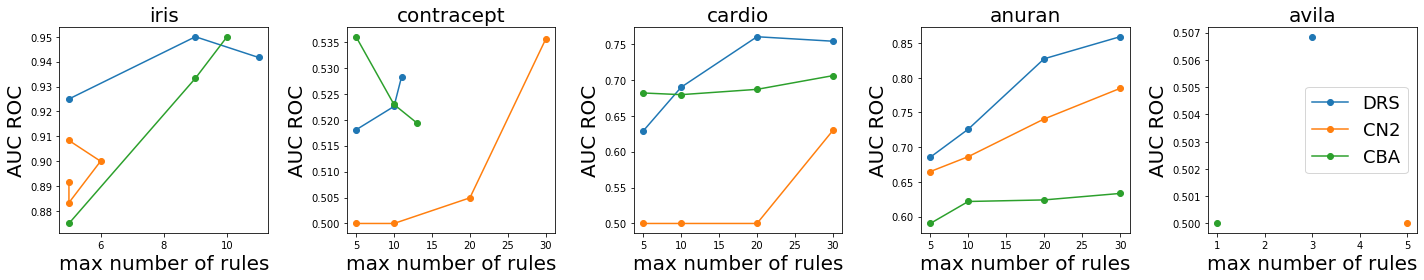

In [10]:
datasets = ['iris', 'contracept', 'cardio', 'anuran', 'avila']
fig, ax_lst = plt.subplots(1, len(datasets), figsize=(20, 4))
sz_font = 20

for dataset,ax in zip(datasets, ax_lst.flatten()):
    data = df2.iloc[df2.index.get_level_values('dataset') == dataset]
#     ax.plot(data.index.get_level_values(1), data['ours-auc'], marker='o', label='DDS')
#     ax.plot(data.index.get_level_values(1), data['cn2-auc'], marker='o', label='CN2')
#     ax.plot(data.index.get_level_values(1), data['cba-auc'], marker='o', label='CBA')
    ours = data[['ours-k','ours-auc']].round({'ours-k': 0}).sort_values(['ours-k'])
    ours = ours.groupby(['ours-k']).mean()
    ax.plot(ours.index, ours['ours-auc'], marker='o', label='DRS')
    
    ax.plot(data['cn2-k'].round(), data['cn2-auc'], marker='o', label='CN2')
    
    cba = data[['cba-k','cba-auc']].round({'cba-k': 0}).sort_values(['cba-k'])
    cba = cba.groupby(['cba-k']).mean()
    ax.plot(cba.index, cba['cba-auc'], marker='o', label='CBA')
    
    ax.set_title(dataset, fontdict={'fontsize': sz_font})
    ax.set_xlabel('max number of rules', fontsize=sz_font)
    ax.set_ylabel('AUC ROC', fontsize=sz_font)
plt.legend(prop={'size': sz_font-2})
fig.tight_layout()
fig.savefig('k.pdf')

## unlimited k

In [53]:
# loader.find_latest().to_dict()
version = 60

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
#     {"config.dataset": "iris"}
#     {"config.dataset": {"$in": ['iris','contracept','cardio']}},
    {"config.dataset": {"$in": ['anuran','avila']}},
#     {"config.dataset": {"$in": ['iris','contracept','cardio','anuran','avila']}},
        ]}
qs = loader.find(query)
df = qs.project(on=[
#                 'config.it',
                {'metrics.n': np.sum},
#                 {'metrics.imb': np.sum},
#                 {'metrics.nitem': np.sum},
#                 {'metrics.ours-mode': np.mean},
                'config.dataset',

#                 {'metrics.ids-k': np.sum},
#                 {'metrics.ids-nconds': np.mean},
#                 {'metrics.ids-bacc': np.sum},
#                 {'metrics.ids-auc': np.sum},
#                 {'metrics.ids-disp': np.sum},                
#                 {'metrics.ids-overlap': np.sum},                
    
                {'metrics.CART-k': np.sum},  
                {'metrics.cn2-k': np.sum},
                {'metrics.cba-k': np.sum},
                {'metrics.ours0-k': np.sum},
                {'metrics.ours1-k': np.sum},
    
                {'metrics.CART-nconds': np.mean},    

                {'metrics.cn2-nconds': np.mean},
                {'metrics.cba-nconds': np.mean},
                {'metrics.ours0-nconds': np.mean},
                {'metrics.ours1-nconds': np.mean},
                    
                {'metrics.CART-bacc': np.sum},

                {'metrics.cn2-bacc': np.sum},
                {'metrics.cba-bacc': np.sum},
                {'metrics.ours0-bacc': np.sum},
                {'metrics.ours1-bacc': np.sum},
                    
                {'metrics.CART-auc': np.sum},
 
                {'metrics.cn2-auc': np.sum},    
                {'metrics.cba-auc': np.sum},
                {'metrics.ours0-auc': np.sum},
                {'metrics.ours1-auc': np.sum},
                {'metrics.cn2-disp': np.sum},
                {'metrics.cba-disp': np.sum},
                {'metrics.ours0-disp': np.sum},    
                {'metrics.ours1-disp': np.sum},   
                {'metrics.cn2-overlap': np.sum},
                {'metrics.cba-overlap': np.sum},
                {'metrics.ours0-overlap': np.sum},    
                {'metrics.ours1-overlap': np.sum},
                
                {'metrics.ours0-q': np.sum},
                {'metrics.ours0-seq': np.sum},
                {'metrics.ours0-nsample': np.sum},
                {'metrics.ours0-lamb': np.sum},
                {'metrics.ours0-precisions-tr': diff},
                {'metrics.ours0-recall-tr': diff},
    
                {'metrics.ours1-q': np.sum},
                {'metrics.ours1-seq': np.sum},
                {'metrics.ours1-nsample': np.sum},
                {'metrics.ours1-lamb': np.sum},
                {'metrics.ours1-precisions-tr': diff},
                {'metrics.ours1-recall-tr': diff},

          ])
# cols = [c.replace('_sum','').replace('_mean','').replace('-tr_<lambda>','').replace('-tr_std','').strip() for c in df.columns]
# df.columns = cols
# # df.sort_values(['dataset','CART-nleaf']).round(3).groupby(['dataset']).mean()
# df.sort_values(['dataset','CART-nleaf']).round(3)
df.sort_values(['dataset'])

,n_sum,dataset,CART-k_sum,cn2-k_sum,cba-k_sum,ours0-k_sum,ours1-k_sum,CART-nconds_mean,cn2-nconds_mean,cba-nconds_mean,ours0-nconds_mean,ours1-nconds_mean,CART-bacc_sum,cn2-bacc_sum,cba-bacc_sum,ours0-bacc_sum,ours1-bacc_sum,CART-auc_sum,cn2-auc_sum,cba-auc_sum,ours0-auc_sum,ours1-auc_sum,cn2-disp_sum,cba-disp_sum,ours0-disp_sum,ours1-disp_sum,cn2-overlap_sum,cba-overlap_sum,ours0-overlap_sum,ours1-overlap_sum,ours0-q_sum,ours0-seq_sum,ours0-nsample_sum,ours0-lamb_sum,ours0-precisions-tr_<lambda>,ours0-recall-tr_<lambda>,ours1-q_sum,ours1-seq_sum,ours1-nsample_sum,ours1-lamb_sum,ours1-precisions-tr_<lambda>,ours1-recall-tr_<lambda>
exp_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1686,7195,anuran,100,90,100,43,39,8.14,4.133333,6.10,9.069767,8.538462,0.903156,0.470807,0.533332,0.783148,0.841134,0.943686,0.688890,0.720326,0.849555,0.890026,0.983017,0.727130,0.999777,0.999788,5750,3416,23,31,kl,1,500,max,0.328750,0.278120,kl,0,500,max,0.241693,0.266658
1694,7195,anuran,100,88,100,37,40,8.12,4.204545,6.05,8.864865,8.300000,0.901718,0.532310,0.536596,0.749010,0.823186,0.941433,0.719881,0.720689,0.845016,0.874984,0.982692,0.732975,0.999800,0.999546,5749,3390,59,163,kl,1,500,max,0.269564,0.363699,kl,0,500,max,0.300245,0.224835
1696,7195,anuran,100,88,100,36,40,8.03,4.113636,6.09,9.361111,8.675000,0.809546,0.463185,0.539808,0.801187,0.791247,0.894175,0.681855,0.724416,0.865644,0.857379,0.983652,0.741403,0.999866,0.999128,5738,3418,96,255,kl,1,500,max,0.252946,0.404114,kl,0,500,max,0.283817,0.210575
1689,16348,avila,100,99,1,2,2,7.71,4.111111,2.00,5.000000,6.000000,0.312196,0.294857,0.250000,0.255528,0.253003,0.546619,0.534876,0.500000,0.504139,0.501823,0.980490,1.000000,1.000000,1.000000,13078,0,0,0,kl,1,500,max,1.000000,0.015934,kl,0,500,max,1.000000,0.025564
1690,16348,avila,100,100,1,4,4,7.74,4.040000,2.00,5.000000,5.250000,0.307108,0.275461,0.250000,0.257648,0.259149,0.543712,0.519248,0.500000,0.505400,0.506311,0.982095,1.000000,1.000000,1.000000,13001,0,0,0,kl,1,500,max,0.989726,0.024060,kl,1,500,max,0.989726,0.026316
1697,16348,avila,100,100,1,4,3,7.72,4.020000,2.00,5.000000,5.000000,0.314466,0.300562,0.250000,0.257443,0.254895,0.550120,0.540792,0.500000,0.505047,0.503010,0.979969,1.000000,1.000000,1.000000,13078,0,0,0,kl,1,500,max,0.989726,0.024812,kl,0,500,max,1.000000,0.024812


### Table

In [54]:
cols = [c.replace('_sum','').replace('_mean','').replace('-tr_<lambda>','').replace('-tr_std','').strip() for c in df.columns]
df.columns = cols

In [55]:
df.columns

Index(['n', 'dataset', 'CART-k', 'cn2-k', 'cba-k', 'ours0-k', 'ours1-k',
       'CART-nconds', 'cn2-nconds', 'cba-nconds', 'ours0-nconds',
       'ours1-nconds', 'CART-bacc', 'cn2-bacc', 'cba-bacc', 'ours0-bacc',
       'ours1-bacc', 'CART-auc', 'cn2-auc', 'cba-auc', 'ours0-auc',
       'ours1-auc', 'cn2-disp', 'cba-disp', 'ours0-disp', 'ours1-disp',
       'cn2-overlap', 'cba-overlap', 'ours0-overlap', 'ours1-overlap',
       'ours0-q', 'ours0-seq', 'ours0-nsample', 'ours0-lamb',
       'ours0-precisions', 'ours0-recall', 'ours1-q', 'ours1-seq',
       'ours1-nsample', 'ours1-lamb', 'ours1-precisions', 'ours1-recall'],
      dtype='object')

In [56]:
df2 = df.groupby(['dataset']).mean()

# df2 = df.groupby(['dataset']).mean()[['n','imb','nitem']]
# print(df2.sort_values(['n']).round(2).to_latex())

df2

,n,CART-k,cn2-k,cba-k,ours0-k,ours1-k,CART-nconds,cn2-nconds,cba-nconds,ours0-nconds,ours1-nconds,CART-bacc,cn2-bacc,cba-bacc,ours0-bacc,ours1-bacc,CART-auc,cn2-auc,cba-auc,ours0-auc,ours1-auc,cn2-disp,cba-disp,ours0-disp,ours1-disp,cn2-overlap,cba-overlap,ours0-overlap,ours1-overlap,ours0-seq,ours0-nsample,ours0-precisions,ours0-recall,ours1-seq,ours1-nsample,ours1-precisions,ours1-recall
dataset,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anuran,7195.0,100.0,88.666667,100.0,38.666667,39.666667,8.096667,4.150505,6.08,9.098581,8.504487,0.871473,0.488767,0.536578,0.777782,0.818522,0.926431,0.696875,0.721811,0.853405,0.874130,0.983121,0.733836,0.999815,0.999487,5745.666667,3408.0,59.333333,149.666667,1.0,500.0,0.283753,0.348644,0.000000,500.0,0.275252,0.234023
avila,16348.0,100.0,99.666667,1.0,3.333333,3.000000,7.723333,4.057037,2.00,5.000000,5.416667,0.311257,0.290293,0.250000,0.256873,0.255683,0.546817,0.531639,0.500000,0.504862,0.503715,0.980851,1.000000,1.000000,1.000000,13052.333333,0.0,0.000000,0.000000,1.0,500.0,0.993151,0.021602,0.333333,500.0,0.996575,0.025564


In [57]:
# Only when IDS is missing
for c in ['ids-k', 'ids-nconds', 'ids-default', 'ids-freq', 'ids-nfreq', 'ids-bacc', 'ids-auc', 'ids-disp', 'ids-overlap']:
    df2.loc[:,c] = None

In [58]:
cols = ['nrules', 'nconds', 'bacc', 'auc', 'disp', 'overlap']
df_cart = df2[['CART-k', 'CART-nconds', 'CART-bacc', 'CART-auc']]
df_cart.columns = cols[:-2]
df_cart['model'] = ['CART']*df_cart.shape[0]
df_cart = df_cart.set_index('model', append=True)

df_ids = df2[['ids-k', 'ids-nconds', 'ids-bacc', 'ids-auc', 'ids-disp', 'ids-overlap']]
df_ids.columns = cols
df_ids['model'] = ['IDS']*df_ids.shape[0]
df_ids = df_ids.set_index('model', append=True)

df_cba = df2[['cba-k', 'cba-nconds', 'cba-bacc', 'cba-auc', 'cba-disp', 'cba-overlap']]
df_cba.columns = cols
df_cba['model'] = ['CBA']*df_cba.shape[0]
df_cba = df_cba.set_index('model', append=True)

df_cn2 = df2[['cn2-k', 'cn2-nconds', 'cn2-bacc', 'cn2-auc', 'cn2-disp', 'cn2-overlap']]
df_cn2.columns = cols
df_cn2['model'] = ['CN2']*df_cn2.shape[0]
df_cn2 = df_cn2.set_index('model', append=True)

df_ours = df2[['ours0-k', 'ours0-nconds', 'ours0-bacc', 'ours0-auc', 'ours0-disp', 'ours0-overlap']]
df_ours.columns = cols
df_ours['model'] = ['Ours0']*df_ours.shape[0]
df_ours = df_ours.set_index('model', append=True)

df_ours1 = df2[['ours1-k', 'ours1-nconds', 'ours1-bacc', 'ours1-auc', 'ours1-disp', 'ours1-overlap']]
df_ours1.columns = cols
df_ours1['model'] = ['Ours1']*df_ours1.shape[0]
df_ours1 = df_ours1.set_index('model', append=True)

# df = pd.concat([df_cart,df_ids,df_cba,df_cn2,df_ours])[['nrules', 'nconds', 'bacc', 'auc', 'disp']]
df = pd.concat([df_ids,df_cba,df_cn2,df_ours,df_ours1])[['nrules', 'nconds', 'bacc', 'auc', 'disp', 'overlap']]
df

/Users/janfan/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/janfan/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/janfan/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

,,nrules,nconds,bacc,auc,disp,overlap
dataset,model,,,,,,
anuran,IDS,NaN,NaN,NaN,NaN,NaN,NaN
avila,IDS,NaN,NaN,NaN,NaN,NaN,NaN
anuran,CBA,100.000000,6.080000,0.536578,0.721811,0.733836,3408.000000
avila,CBA,1.000000,2.000000,0.250000,0.500000,1.000000,0.000000
anuran,CN2,88.666667,4.150505,0.488767,0.696875,0.983121,5745.666667
avila,CN2,99.666667,4.057037,0.290293,0.531639,0.980851,13052.333333
anuran,Ours0,38.666667,9.098581,0.777782,0.853405,0.999815,59.333333
avila,Ours0,3.333333,5.000000,0.256873,0.504862,1.000000,0.000000
anuran,Ours1,39.666667,8.504487,0.818522,0.874130,0.999487,149.666667


In [59]:
#df = df.sort_index(axis=0, level=['dataset', 'model']).fillna(-1)
df = df.sort_index(axis=0, level=['dataset', 'model'])
df

nrules    nconds      bacc       auc      disp  \
dataset model                                                       
anuran  CBA    100.000000  6.080000  0.536578  0.721811  0.733836   
        CN2     88.666667  4.150505  0.488767  0.696875  0.983121   
        IDS           NaN       NaN       NaN       NaN       NaN   
        Ours0   38.666667  9.098581  0.777782  0.853405  0.999815   
        Ours1   39.666667  8.504487  0.818522  0.874130  0.999487   
avila   CBA      1.000000  2.000000  0.250000  0.500000  1.000000   
        CN2     99.666667  4.057037  0.290293  0.531639  0.980851   
        IDS           NaN       NaN       NaN       NaN       NaN   
        Ours0    3.333333  5.000000  0.256873  0.504862  1.000000   
        Ours1    3.000000  5.416667  0.255683  0.503715  1.000000   

                    overlap  
dataset model                
anuran  CBA     3408.000000  
        CN2     5745.666667  
        IDS             NaN  
        Ours0     59.333333  
        Ours1    149.666667  
avila   CBA        0.000000  
        CN2    13052.333333  
        IDS             NaN  
        Ours0      0.000000  
        Ours1      0.000000

In [60]:
tex = latex(df.round(3), groups=[
#     'titanic','iris','diab','german','thyroid','adult'
#     'iris', 'contracept', 'cardio'
    'anuran', 'avila'
#     'anuran', 'avila', 'poker0.1'
    ],
     cols=['nrules', 'nconds', 'bacc', 'auc', 'disp', 'overlap'],
     vals=[1e8,1e8,0,0,0,1e8],
     funcs=[min,min,max,max,max,min])
print(tex)

\begin{tabular}{llrrrrrr}
\toprule
      &       &   nrules &  nconds &   bacc &    auc &   disp &    overlap \\
dataset & model &          &         &        &        &        &            \\
\midrule
anuran	&CBA   &       100.0 &       6.08 &      0.537 &      0.722 &    0.734 &      3408.0 \\
anuran	&CN2   &      88.667 & \bf{4.151} &      0.489 &      0.697 &    0.983 &    5745.667 \\
anuran	&IDS   &         nan &        nan &        nan &        nan &      nan &         nan \\
anuran	&Ours0 & \bf{38.667} &      9.099 &      0.778 &      0.853 & \bf{1.0} & \bf{59.333} \\
anuran	&Ours1 &      39.667 &      8.504 & \bf{0.819} & \bf{0.874} &    0.999 &     149.667 \\\midrule
avila	&CBA   & \bf{1.0} & \bf{2.0} &      0.25 &        0.5 & \bf{1.0} &  \bf{0.0} \\
avila	&CN2   &   99.667 &    4.057 & \bf{0.29} & \bf{0.532} &    0.981 & 13052.333 \\
avila	&IDS   &      nan &      nan &       nan &        nan &      nan &       nan \\
avila	&Ours0 &    3.333 &      5.0 &     0.257 &      0.5

# Lambda

In [174]:
# loader.find_latest().to_dict()

version = 58

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
        ]}
qs = loader.find(query)
df = qs.project(on=['config.dataset',
                'config.it',
#                 {'metrics.n': np.sum},
#                 {'metrics.imb': np.sum},
#                 {'metrics.nitem': np.sum},
                    
                {'metrics.ours-k': np.sum},
                {'metrics.ours-nconds': np.mean},
                {'metrics.ours-seq': np.sum},
                {'metrics.ours-q': np.sum},
                {'metrics.ours-nsample': np.sum},
                {'metrics.ours-lamb': np.sum},
                {'metrics.ours-bacc': np.sum},
                {'metrics.ours-auc': np.sum},
                {'metrics.ours-disp': np.sum},
                {'metrics.ours-precisions-tr': diff},
                {'metrics.ours-recall-tr': diff},
          ])
df.sort_values(['dataset','ours-lamb_sum'])

,dataset,it,ours-k_sum,ours-nconds_mean,ours-seq_sum,ours-q_sum,ours-nsample_sum,ours-lamb_sum,ours-bacc_sum,ours-auc_sum,ours-disp_sum,ours-precisions-tr_<lambda>,ours-recall-tr_<lambda>
exp_id,,,,,,,,,,,,,
1631,anuran,1,30,8.200000,0,kl,100,0,0.519262,0.700897,0.848738,1.000000,0.743778
1648,anuran,2,29,8.931034,0,kl,100,0,0.533095,0.712395,0.884407,0.981481,0.748303
1655,anuran,3,36,8.416667,0,kl,100,0,0.461455,0.681644,0.876649,0.750283,0.750283
1596,anuran,1,43,9.046512,0,kl,100,max,0.801737,0.864286,0.999475,0.406488,0.268647
1620,anuran,2,41,9.243902,0,kl,100,max,0.819164,0.877441,0.999700,0.388573,0.280766
1649,anuran,3,36,8.694444,0,kl,100,max,0.792776,0.860944,0.999780,0.391684,0.208536
1624,anuran,1,46,9.173913,0,kl,100,mean,0.817591,0.879316,0.995986,0.359710,0.291967
1651,anuran,2,35,8.657143,0,kl,100,mean,0.805078,0.873117,0.994667,0.417575,0.285871
1658,anuran,3,43,8.767442,0,kl,100,mean,0.818823,0.881037,0.995417,0.349911,0.316599


In [175]:
cols = [c.replace('_sum','').replace('_mean','').replace('-tr_<lambda>','').replace('-tr_std','').replace('ours-','').strip() for c in df.columns]
df.columns = cols

In [176]:
df.columns

Index(['dataset', 'it', 'k', 'nconds', 'seq', 'q', 'nsample', 'lamb', 'bacc',
       'auc', 'disp', 'precisions', 'recall'],
      dtype='object')

In [521]:
# df['disp'][df['disp'] == -1] = 1

In [177]:
df2 = df.groupby(['dataset','lamb']).mean()[['k','nconds','bacc','auc','disp']]

In [178]:
df2

k    nconds      bacc       auc      disp
dataset    lamb                                                   
anuran     0     31.666667  8.515900  0.504604  0.698312  0.869931
           max   40.000000  8.994953  0.804559  0.867557  0.999652
           mean  41.333333  8.866166  0.813831  0.877823  0.995357
avila      0      4.000000  4.722222  0.258191  0.506312  0.589838
           max    3.666667  5.317460  0.261432  0.508367  1.000000
           mean   3.666667  4.976190  0.259662  0.507779  0.999091
cardio     0     21.666667  7.853030  0.498559  0.659732  0.959313
           max   53.000000  8.993126  0.644028  0.741464  0.999857
           mean  45.666667  8.667505  0.707940  0.783427  0.996554
contracept 0      3.333333  3.638889  0.359788  0.519772  0.903793
           max    3.666667  4.016667  0.348276  0.511044  0.991917
           mean   6.333333  4.511905  0.351496  0.514237  0.980935
iris       0      8.000000  1.625000  0.866667  0.900000  0.660410
           max    8.666667  2.022222  0.888889  0.916667  1.000000
           mean   9.000000  2.000000  0.866667  0.900000  0.982013

In [179]:
tex = latex(df2.round(3), groups=['iris', 'contracept', 'cardio', 'anuran', 'avila'],
# tex = latex(df2.round(3), groups=['anuran'],
# tex = latex(df2.round(3), groups=['iris', 'contracept', 'cardio', 'avila'],
     cols=['k','nconds','bacc','auc','disp'],
     vals=[1e8,1e8,0,0,0],
     funcs=[min,min,max,max,max])
print(tex)

\begin{tabular}{llrrrrr}
\toprule
     &      &       k &  nconds &   bacc &    auc &   disp \\
dataset & lamb &         &         &        &        &        \\
\midrule
iris	&0    & \bf{8.0} & \bf{1.625} &      0.867 &        0.9 &     0.66 \\
iris	&max  &    8.667 &      2.022 & \bf{0.889} & \bf{0.917} & \bf{1.0} \\
iris	&mean &      9.0 &        2.0 &      0.867 &        0.9 &    0.982 \\\midrule
contracept	&0    & \bf{3.333} & \bf{3.639} & \bf{0.36} & \bf{0.52} &      0.904 \\
contracept	&max  &      3.667 &      4.017 &     0.348 &     0.511 & \bf{0.992} \\
contracept	&mean &      6.333 &      4.512 &     0.351 &     0.514 &      0.981 \\\midrule
cardio	&0    & \bf{21.667} & \bf{7.853} &      0.499 &       0.66 &    0.959 \\
cardio	&max  &        53.0 &      8.993 &      0.644 &      0.741 & \bf{1.0} \\
cardio	&mean &      45.667 &      8.668 & \bf{0.708} & \bf{0.783} &    0.997 \\\midrule
anuran	&0    & \bf{31.667} & \bf{8.516} &      0.505 &      0.698 &     0.87 \\
anuran	&max 